# Advanced Statistics For Physics - Fourth assignment

* **Student:** Faorlin Tommaso
* **ID:** 2021857
* **Course:** Physics of Data

In [1]:
options(tidyverse.quiet = TRUE)
library(gridExtra)
library(tidyverse)

## Exercise 1 - Six Boxes Toy Model: Inference

As suggested, in order to have a better experience, I have uploaded a *R script* to be launched from terminal.

## Exercise 2 - Six Boxes Toy Model: Simulation

[1] "=================================="
[1] "       SIX BOXES TOY MODEL        "
[1] " Sit and enjoy Bayesian inference "
[1] "=================================="
[1] "The bag extracted is: H3"
[1] "The bag inferred is the one with the highest probability form Bayesian inference"


Warning message:
“Removed 9998 rows containing missing values (geom_point).”
Warning message:
“Removed 9998 rows containing missing values (geom_point).”
Warning message:
“Removed 9998 rows containing missing values (geom_point).”
Warning message:
“Removed 9998 rows containing missing values (geom_point).”
Warning message:
“Removed 9998 rows containing missing values (geom_point).”
Warning message:
“Removed 9998 rows containing missing values (geom_point).”


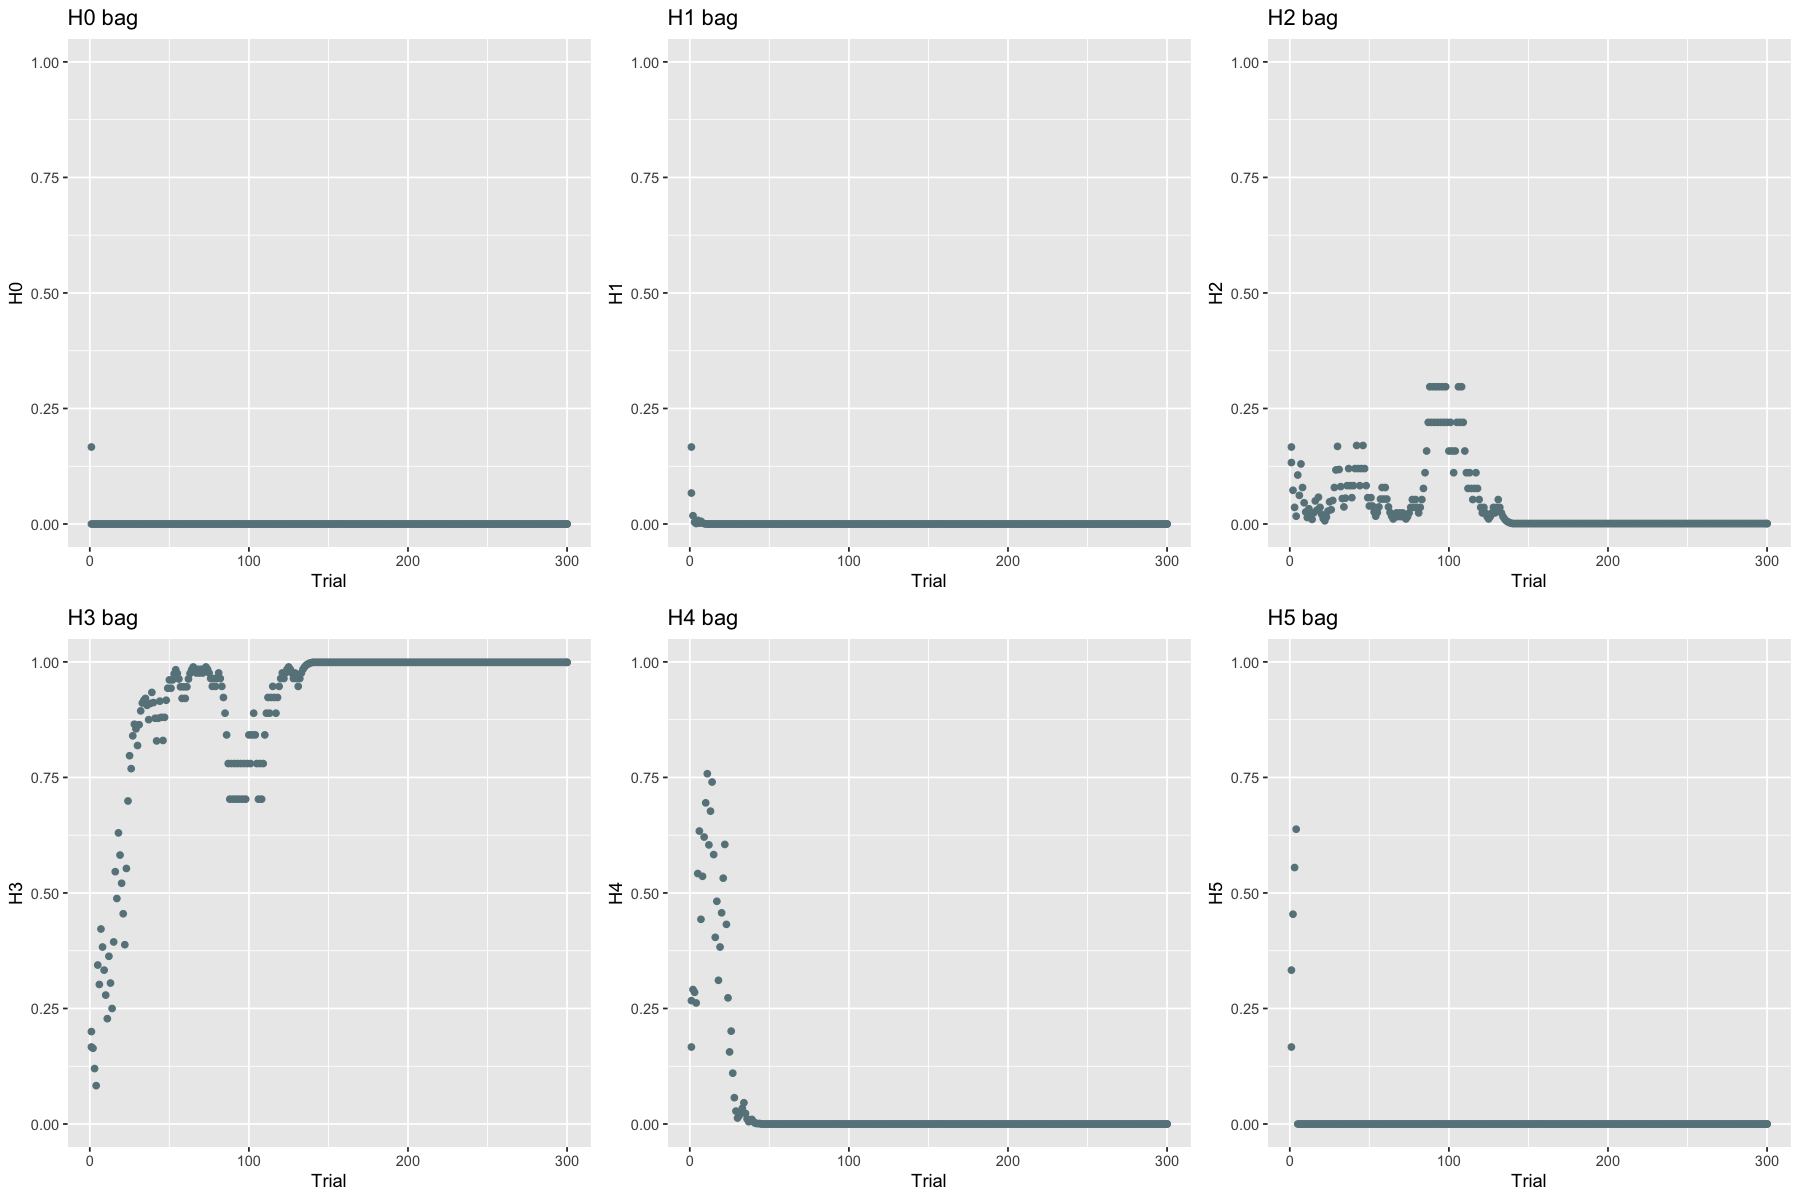

In [13]:
L0 <- c(1,4/5,3/5,2/5,1/5,0)
L1 <- c(0,1/5,2/5,3/5,4/5,1)

prior <- rep(1/6,6)
condition = TRUE
 
print('==================================')
print('       SIX BOXES TOY MODEL        ')
print(' Sit and enjoy Bayesian inference ')
print('==================================')

prob <- sample(c(0:5),1)/5
num_samples <- 300
res <- sample(c(0,1), size=num_samples, prob=c(1-prob,prob), replace=TRUE)

print(paste('The bag extracted is:',paste0('H',(prob*5))))
print('The bag inferred is the one with the highest probability form Bayesian inference')

count = 1
evolving_ps<-data.frame(Count=count, H0=prior[1], H1=prior[2], H2=prior[3], H3=prior[4], H4=prior[5], H5=prior[6])
for (i in res){

    if (i==0){
        prior=prior*L0
        prior=round(prior/sum(prior),3)
    } else if (i==1){
        prior=prior*L1
        prior=round(prior/sum(prior),3)
    } else {
        print('Extraction ended!')
        condition = FALSE
    }
    temp.data_frame<-data.frame(Count=count, H0=prior[1], H1=prior[2], H2=prior[3], H3=prior[4], H4=prior[5], H5=prior[6])
    evolving_ps<-rbind(evolving_ps,temp.data_frame)
    evolving_ps[nrow(df) + 1,] = c(count,prior[1],prior[2],prior[3],prior[4],prior[5],prior[6])
    count=count+1
    
}

options(repr.plot.width=15, repr.plot.height=10)

p1<-ggplot(data= evolving_ps) + geom_point(aes(x=Count ,y=H0),colour='lightblue4') + ylim(0,1) + ggtitle('H0 bag') + labs(x="Trial")
p2<-ggplot(data= evolving_ps) + geom_point(aes(x=Count ,y=H1),colour='lightblue4') + ylim(0,1) + ggtitle('H1 bag') + labs(x="Trial")
p3<-ggplot(data= evolving_ps) + geom_point(aes(x=Count ,y=H2),colour='lightblue4') + ylim(0,1) + ggtitle('H2 bag') + labs(x="Trial")
p4<-ggplot(data= evolving_ps) + geom_point(aes(x=Count ,y=H3),colour='lightblue4') + ylim(0,1) + ggtitle('H3 bag') + labs(x="Trial")
p5<-ggplot(data= evolving_ps) + geom_point(aes(x=Count ,y=H4),colour='lightblue4') + ylim(0,1) + ggtitle('H4 bag') + labs(x="Trial")
p6<-ggplot(data= evolving_ps) + geom_point(aes(x=Count ,y=H5),colour='lightblue4') + ylim(0,1) + ggtitle('H5 bag') + labs(x="Trial")

grid.arrange(p1,p2,p3,p4,p5,p6,ncol=3,nrow=2)

## Exercise 3 - Reproductive property of Gamma distribution

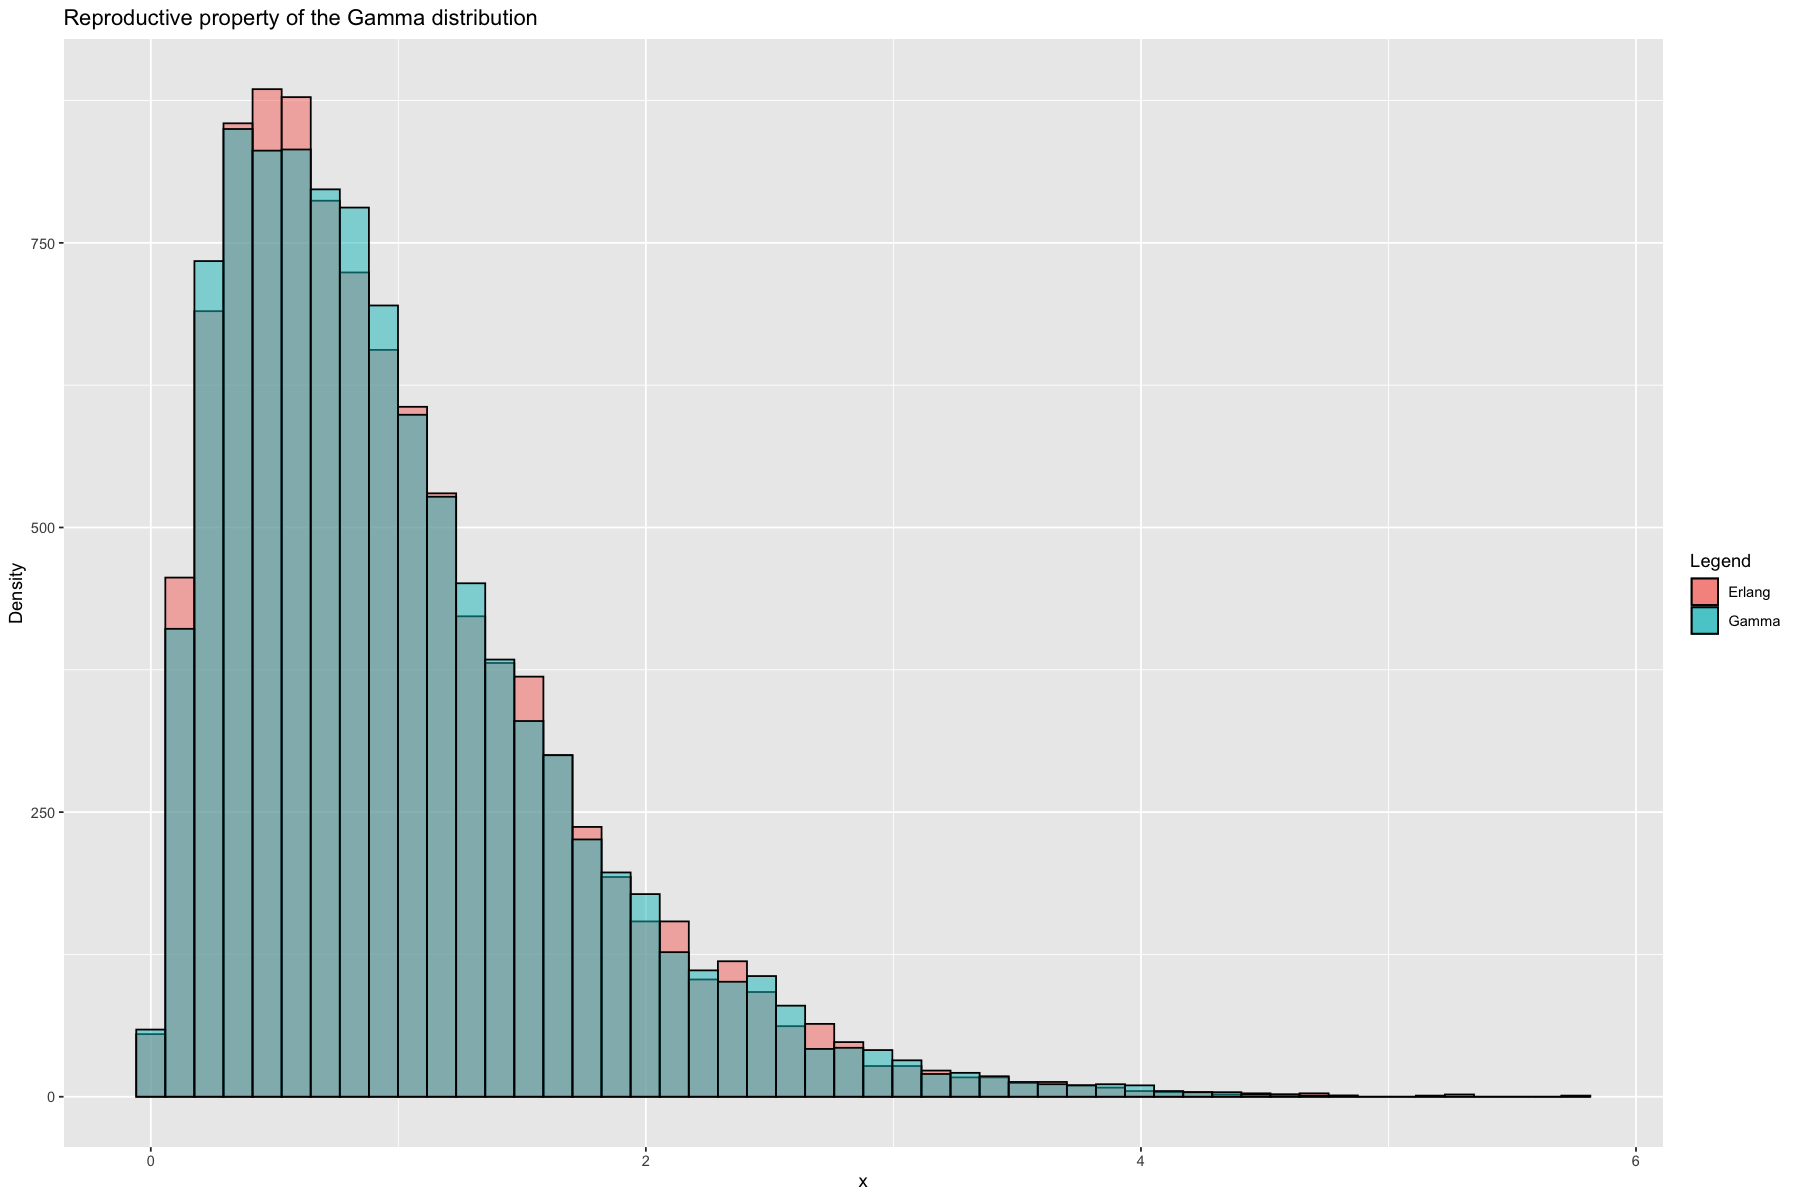

In [3]:
n=10000
m=2
b=0.5

rerlang.c <- function(n, m, b) {
    return(as.numeric(-b*colSums(log(data.frame(replicate(n,runif(m)))))))
}
df <- data.frame(erlang=rerlang.c(n,m,b), gamma=rgamma(n, m, 1/b))

ggplot(data=df)+
    geom_histogram(aes(erlang, fill='Erlang'), bins=50,color='black', alpha=0.5)+
    geom_histogram(aes(gamma, fill='Gamma'), bins=50, color='black', alpha=.5)+
    ggtitle('Reproductive property of the Gamma distribution')+
    labs(x='x', y='Density', fill='Legend')

## Exercise 4 - *Middle Square algorithm*

To generate a sequence of n-digit pseudorandom numbers, an n-digit starting value is created and squared, producing a 2n-digit number.

In [9]:
generate_number <- function(x){
    input.list <- unlist(strsplit(as.character(x),""))
    output.untrimmed <- unlist(strsplit(as.character(x^2),""))
    l.input <- length(input.list)
    l.square <- length(output.untrimmed)
    diff <- l.square-l.input

    if (diff%%2==0){output <- (paste(output.untrimmed[(diff/2+1):(l.square-(diff/2))], collapse=""))}
    else {output <- (paste(output.untrimmed[((diff+1)/2):(l.square-((diff+1)/2))], collapse=""))}
    
    return(output)
}

x<-5772156649:5772156700
print(paste('Seed:',x,' | Seed^2:',x^2,' | Output:',sapply(x,generate_number)))

 [1] "Seed: 5772156649  | Seed^2: 33317792380594909184  | Output: 7923805949"
 [2] "Seed: 5772156650  | Seed^2: 33317792392139223040  | Output: 7923921392"
 [3] "Seed: 5772156651  | Seed^2: 33317792403683536896  | Output: 7924036835"
 [4] "Seed: 5772156652  | Seed^2: 33317792415227850752  | Output: 7924152278"
 [5] "Seed: 5772156653  | Seed^2: 33317792426772160512  | Output: 7924267721"
 [6] "Seed: 5772156654  | Seed^2: 33317792438316474368  | Output: 7924383164"
 [7] "Seed: 5772156655  | Seed^2: 33317792449860788224  | Output: 7924498607"
 [8] "Seed: 5772156656  | Seed^2: 33317792461405102080  | Output: 7924614051"
 [9] "Seed: 5772156657  | Seed^2: 33317792472949415936  | Output: 7924729494"
[10] "Seed: 5772156658  | Seed^2: 33317792484493729792  | Output: 7924844937"
[11] "Seed: 5772156659  | Seed^2: 3.3317792496038e+19  | Output: 1779249603" 
[12] "Seed: 5772156660  | Seed^2: 33317792507582357504  | Output: 7925075823"
[13] "Seed: 5772156661  | Seed^2: 33317792519126667264  | Output